# Investigation of Carbon-Dioxide Footprints of Different Food Groups #

In [171]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_excel('food_data_simple.xlsx')

## Exploratory Analyses ##

In [172]:
# preliminary exploration of data #1

df.info()
df.head()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   FOOD COMMODITY GROUP                              324 non-null    object 
 1   Food commodity ITEM                               324 non-null    object 
 2   Carbon Footprint kg CO2eq/kg or l of food ITEM    324 non-null    float64
 3   Food commodity TYPOLOGY                           324 non-null    object 
 4   Carbon Footprint g CO2eq/g o cc of food TYPOLOGY  324 non-null    float64
dtypes: float64(2), object(3)
memory usage: 12.8+ KB


,Carbon Footprint kg CO2eq/kg or l of food ITEM,Carbon Footprint g CO2eq/g o cc of food TYPOLOGY
count,324.000000,324.000000
mean,3.098539,2.858299
std,5.758602,5.292955
min,0.109000,0.270000
25%,0.598750,0.565000
50%,1.376000,1.437000
75%,3.200000,3.880596
max,78.800175,78.800000


By lookig at the information provided by .head() and, by taking a look at the dataset itself (in this case it was relatively easy as it was originally a .xlsx file and not too large) we could see that the data quality is rather good, e.g. we don't have any missing values. So, at this stag no further cleaning is necessary.\
Note: a few uniformative / empty columns were dropped already\
\
The summary statistics for numeric values provided by .describe() were also noted.

In [173]:
# preliminary exploration of data ctn'd

df["FOOD COMMODITY GROUP"].value_counts()

CROPS                     117
AGRICULTURAL PROCESSED    100
FISHING                    61
ANIMAL HUSBANDRY           46
Name: FOOD COMMODITY GROUP, dtype: int64

## Relative Distribution of CO<sub>2</sub> Footprint by Food Commodity Categories ##

Here we're dealing with categorical variables so, we'll aim to make a bar chart for each variable to see what the relative distribution is.\
So, we proceed to get the mean for each food commodity group and visualise potential trends:

Text(0, 0.5, 'CO2 Footprint [kg CO2/eq kg]')

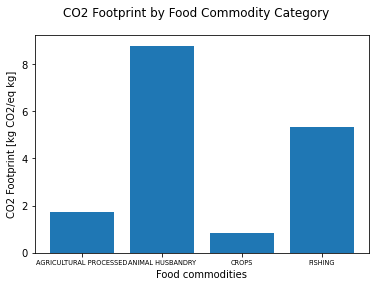

In [181]:
df.rename(columns ={'Carbon Footprint kg CO2eq/kg or l of food ITEM': 'CO2_FP_item'}, inplace=True)
commodity_group_means = df.groupby("FOOD COMMODITY GROUP").CO2_FP_item.mean().reset_index()

fig, ax = plt.subplots()
#plt.grid()
ax.bar(commodity_group_means.iloc[:,0], commodity_group_means.iloc[:,1], width=0.8)
fig.suptitle('CO2 Footprint by Food Commodity Category')
plt.rc('xtick', labelsize=6.6)
plt.xlabel('Food commodities')
plt.ylabel('CO2 Footprint [kg CO2/eq kg]')


**It can be seen that the 'ANIMAL HUSBANDRY' and 'FISHING' commodity categories have a higher mean CO<sub>2</sub> footprint when expressed in [kg CO2/eq kg].**

Further questions may be posed, such as:\
    - are these differences statistically significant? (particularly interesting when looking at 'ANIMAL HUSBANDRY' vs 'FISHING')\
    - is the mean an accurate statistic to describe the existing trends?\
    \
*These questions will be investigated later on.*

## Relative Distribution of CO<sub>2</sub> Footprint by Food Topology Categories ##

Similarly to the above case, just looking at CO<sub>2</sub> footprint per food typology (higher resolution than food commodity group):

Text(0, 0.5, 'CO2 Footprint [g Co2/eq g]')

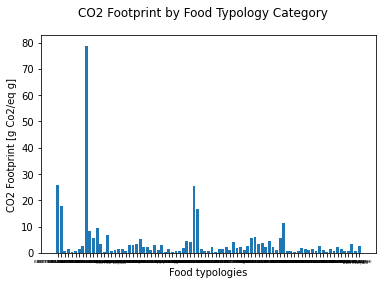

In [179]:
df.rename(columns ={'Carbon Footprint g CO2eq/g o cc of food TYPOLOGY': 'CO2_FP_typology'}, inplace=True)
typology_means = df.groupby("Food commodity TYPOLOGY").CO2_FP_typology.mean().reset_index()

fig, ax = plt.subplots()
#plt.grid()
ax.bar(typology_means.iloc[:,0], typology_means.iloc[:,1], width=0.8)
fig.suptitle('CO2 Footprint by Food Typology Category')
plt.rc('xtick', labelsize=0.00000001)
plt.xlabel('Food typologies')
plt.ylabel('CO2 Footprint [g Co2/eq g]')

From this it can be seen that there exist certain outliers within the topologies which have an outstandingly high CO<sub>2</sub> footprint.\
\
*These will be investigated further.*

## Investigating Outliers - Food Topology ##

Strictly following the scientific method, we'll eyeball some arbitrary cutoff value for outliers from the chart - 10 seems like a reasonable value - and see which typologies perform the worst in terms of CO<sub>2</sub> footprint.

In [176]:
typ_outliers = typology_means[typology_means.CO2_FP_typology > 10]
print(typ_outliers)

    Food commodity TYPOLOGY  CO2_FP_typology
0      BEEF BONE FREE MEAT*        25.750000
1      BEEF MEAT WITH BONE*        17.960000
8   BUFFALO BONE FREE MEAT*        78.800000
38     LAMB BONE FREE MEAT*        25.232558
39     LAMB MEAT WITH BONE*        16.701088
63         SHELLFISH FROZEN        11.470000


It seems like most of the worst-performing typologies are types of red meat - we've all heard that red meat is "bad for you and the environment"... This data may confirm the latter but, let's investigate further!\
\
It may be noted also that among these worst typologies the least bad (SHELLFISH FROZEN) was the only non red meat.\
\
And, as we migt have guessed, each item in this "worst list" belongs to the Commodity Category "ANIMAL HUSBANDRY" or "FISHING" - these were identified as having higher mean CO<sub>2</sub> footprints than other commodity categories previously.

Text(0, 0.5, 'CO2 Footprint [g Co2/eq g]')

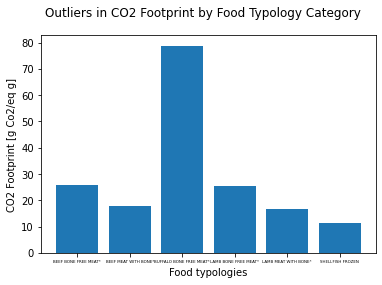

In [178]:
# plot the outliers

fig, ax = plt.subplots()
ax.bar(typ_outliers.iloc[:,0], typ_outliers.iloc[:,1], width=0.8)
fig.suptitle('Outliers in CO2 Footprint by Food Typology Category')
plt.rc('xtick', labelsize=4)
plt.xlabel('Food typologies')
plt.ylabel('CO2 Footprint [g Co2/eq g]')